In [3]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params, load_params
from multi_group_simulation import MultiGroupSimulation

In [4]:
num_options = 4

interaction_matrix = np.array([[12.5,4,0.1,0.1,1,0.05,0.05,0.1],
                               [3.41,8,0.1,0.1,1,0.05,0.05,0.2],
                               [0.19,0.22,4,0.1,1.2,0.05,0.2,1.8],
                               [0.14,0.17,0.07,9,1,0.05,0.05,0.2],
                               [1.92,2.26,1.22,1.37,1,0.15,0.3,1.56],
                               [0.18,0.21,0.1,0.13,0.28,1.8,0.2,1.56],
                               [0.07,0.09,0.15,0.05,0.23,0.08,1.8,1.56],
                               [0.011,0.026,0.106,0.016,0.091,0.048,0.12,3.5]])

group_names = ['UG (campus)', 'UG (off campus)', 'GS (research)', 'GS (other)', 'Faculty/Staff (student facing)', 'Faculty/Staff (non student facing)', 'Faculty/Staff (off campus)', 'Ithaca Community']

num_trajectories = 200
num_groups = len(group_names)
free_and_infectious = np.zeros((num_trajectories, num_groups, num_options))
QS = np.zeros((num_trajectories, num_groups, num_options))
QI = np.zeros((num_trajectories, num_groups, num_options))
    
for k in range(num_options):
    opt = k + 1
    ug_dorm_params = load_params('../src/simulations_v2/params/quarantine_analysis/aug9quarantine/move_in_weekend/nominal_option_{}/ug_dorm.yaml'.format(opt))[1]
    ug_off_campus_params = load_params('../src/simulations_v2/params/quarantine_analysis/aug9quarantine/move_in_weekend/nominal_option_{}/ug_off_campus.yaml'.format(opt))[1]
    gs_research_params = load_params('../src/simulations_v2/params/quarantine_analysis/aug9quarantine/move_in_weekend/nominal_option_{}/grad_research.yaml'.format(opt))[1]
    gs_other_params = load_params('../src/simulations_v2/params/quarantine_analysis/aug9quarantine/move_in_weekend/nominal_option_{}/grad_other.yaml'.format(opt))[1]
    faculty_staff_student_params = load_params('../src/simulations_v2/params/quarantine_analysis/aug9quarantine/move_in_weekend/nominal_option_{}/faculty_staff_student_same_age.yaml'.format(opt))[1]
    faculty_staff_non_student_params = load_params('../src/simulations_v2/params/quarantine_analysis/aug9quarantine/move_in_weekend/nominal_option_{}/faculty_staff_non_student_same_age.yaml'.format(opt))[1]
    faculty_staff_off_campus_params = load_params('../src/simulations_v2/params/quarantine_analysis/aug9quarantine/move_in_weekend/nominal_option_{}/faculty_staff_off_campus_same_age.yaml'.format(opt))[1]
    ithaca_community_params = load_params('../src/simulations_v2/params/quarantine_analysis/aug9quarantine/move_in_weekend/nominal_option_{}/ithaca_community.yaml'.format(opt))[1]
    
    params_list = [ug_dorm_params.copy(), ug_off_campus_params.copy(), gs_research_params.copy(), gs_other_params.copy(), faculty_staff_student_params.copy(), faculty_staff_non_student_params.copy(), faculty_staff_off_campus_params.copy(), ithaca_community_params.copy()]
    
    sim = MultiGroupSimulation(params_list, interaction_matrix, group_names)
    


    for i in range(num_trajectories):
        sim.reset_initial_state()
        for _ in range(18):
            sim.step()

        for j in range(num_groups):
            free_and_infectious[i, j, k] = sim.get_free_infectious(j)
            QS[i, j, k] = sim.sims[j].QS
            QI[i, j, k] = sim.sims[j].QI
    
    print("Option {}".format(k))
    print("free-and-infectious: ", np.mean(free_and_infectious[:, :, k], axis=0))
    
    populations = [sim.sims[j].pop_size for j in range(num_groups)]
    print("prevalence:", np.mean(free_and_infectious[:, :, k], axis=0) / populations)
    print("QS: ", np.mean(QS[:, :, k], axis=0))
    print("QI: ", np.mean(QI[:, :, k], axis=0))

/home/jw2529/group-testing/src/simulations_v2/load_params.py:136: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)
/home/jw2529/group-testing/src/simulations_v2/load_params.py:45: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  age_sev_params = yaml.load(f)


Option 0
free-and-infectious:  [ 3.035  3.585  1.725  1.135  1.405  0.565  2.51  18.515]
prevalence: [0.00072834 0.00046943 0.00059585 0.00029043 0.00039049 0.00029628
 0.00052532 0.00029863]
QS:  [ 42.09  72.24  17.88  24.48  19.41   4.83  22.35 223.29]
QI:  [21.21  33.625  9.29  13.18  11.465  3.05   6.045 61.84 ]
Option 1
free-and-infectious:  [14.46  15.495  4.43   4.75   5.12   1.04   3.43  21.985]
prevalence: [0.00347012 0.00202894 0.00153022 0.00121546 0.00142301 0.00054536
 0.00071787 0.0003546 ]
QS:  [146.91 184.62  27.48  55.77  43.14   7.59  22.65 235.11]
QI:  [63.58  79.79  12.035 25.365 20.495  3.37   5.715 65.425]
Option 2
free-and-infectious:  [ 9.635 11.275  3.375  3.135  3.755  0.875  3.125 20.12 ]
prevalence: [0.00231222 0.00147637 0.0011658  0.0008022  0.00104364 0.00045884
 0.00065404 0.00032452]
QS:  [ 60.72  95.07  20.64  31.08  26.13   6.15  21.81 230.16]
QI:  [28.61  41.92   9.31  15.56  13.595  2.875  5.46  63.945]
Option 3
free-and-infectious:  [ 9.25  10.405 

In [9]:
# statistics within Ithaca
print([np.sum(np.mean(free_and_infectious[:, :, k], axis=0)) for k in range(num_options)])
print([np.sum(np.mean(QI[:, :, k], axis=0)) for k in range(num_options)])
print([np.sum(np.mean(QS[:, :, k], axis=0)) for k in range(num_options)])

[32.474999999999994, 70.71, 55.295, 52.19]
[159.705, 275.775, 181.275, 171.755]
[426.57, 723.27, 491.76, 470.01]


In [13]:
# statistics within Cornell (including students, faculty / staff)
print([np.sum(np.mean(free_and_infectious[:, :7, k], axis=0)) for k in range(num_options)])
print([np.sum(np.mean(QI[:, :7, k], axis=0)) for k in range(num_options)])
print([np.sum(np.mean(QS[:, :7, k], axis=0)) for k in range(num_options)])

[13.959999999999999, 48.724999999999994, 35.175, 33.105000000000004]
[97.86500000000001, 210.35000000000002, 117.33, 107.86499999999998]
[203.28, 488.1599999999999, 261.59999999999997, 239.61]


In [16]:
# quarantine/isolation statistics of students
print([np.sum(np.mean(QI[:, :4, k], axis=0)) for k in range(num_options)])
print([np.sum(np.mean(QS[:, :4, k], axis=0)) for k in range(num_options)])

[77.305, 180.77, 95.4, 86.21]
[156.69, 414.78, 207.51, 185.70000000000002]


In [25]:
# quarantine/isolation statistics of students
print([np.sum(np.percentile(QI[:, :4, k], 90, axis=0)) for k in range(num_options)])
print([np.sum(np.percentile(QS[:, :4, k], 90, axis=0)) for k in range(num_options)])

[106.0, 232.1, 131.2, 119.19999999999999]
[228.59999999999997, 546.0, 294.0, 276.0]


In [14]:
# quarantine/isolation statistics of on-campus students
print([np.sum(np.mean(QI[:, 0, k], axis=0)) for k in range(num_options)])
print([np.sum(np.mean(QS[:, 0, k], axis=0)) for k in range(num_options)])

[21.21, 63.58, 28.61, 24.695]
[42.09, 146.91, 60.72, 50.85]


In [26]:
# quarantine/isolation statistics of on-campus students
print([np.sum(np.percentile(QI[:, 0, k], 90, axis=0)) for k in range(num_options)])
print([np.sum(np.percentile(QS[:, 0, k], 90, axis=0)) for k in range(num_options)])

[30.0, 83.1, 42.099999999999994, 36.099999999999994]
[66.0, 198.0, 90.0, 84.0]


In [15]:
# quarantine/isolation statistics of off-campus students
print([np.sum(np.mean(QI[:, 1:4, k], axis=0)) for k in range(num_options)])
print([np.sum(np.mean(QS[:, 1:4, k], axis=0)) for k in range(num_options)])

[56.095, 117.19, 66.79, 61.515]
[114.6, 267.87, 146.79, 134.85000000000002]


In [27]:
# quarantine/isolation statistics of off-campus students
print([np.sum(np.percentile(QI[:, 1:4, k], 90, axis=0)) for k in range(num_options)])
print([np.sum(np.percentile(QS[:, 1:4, k], 90, axis=0)) for k in range(num_options)])

[76.0, 149.0, 89.1, 83.1]
[162.59999999999997, 348.0, 204.0, 192.0]


(array([ 9., 20., 22., 22., 39., 26., 24., 15.,  9., 14.]),
 array([ 96. , 114.6, 133.2, 151.8, 170.4, 189. , 207.6, 226.2, 244.8,
        263.4, 282. ]),
 <a list of 10 Patch objects>)

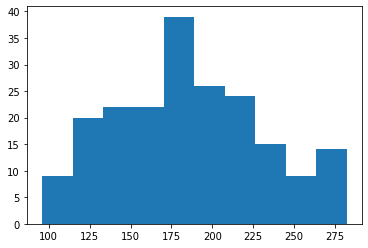

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.hist(np.sum(QS[:, :4, 3],axis=1))

In [22]:
np.savetxt('/home/jw2529/results/free_and_infectious_nominal_option_4.out', free_and_infectious[:, :, 3])
np.savetxt('/home/jw2529/results/QI_nominal_option_4.out', QI[:, :, 3])
np.savetxt('/home/jw2529/results/QS_nominal_option_4.out', QS[:, :, 3])